In [3]:
# -*- coding: utf-8 -*-
"""
Second Jupyter notebook as a working copy for when the first one is busy scraping

"""

import pandas as pd
import matplotlib.pyplot as plt
#import csv

import sqlite3
from godwin import Scraper, Database
import requests
from lxml import html

db = Database('Godwin.db')
posts = db.get_data()
posts['num_prev_comments'].fillna(posts['num_comments'], inplace=True)
posts['failure'] = posts['comment_id'].notnull().astype('int')

/users/edsouza/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


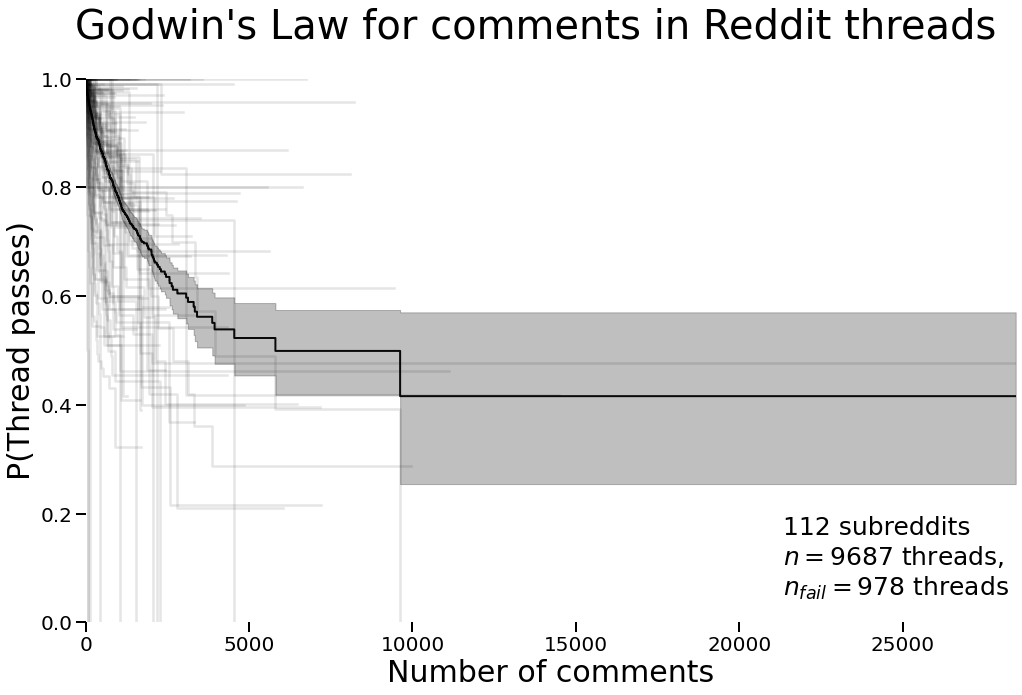

In [79]:
(fig, ax) = plt.subplots(1,1, figsize=(25 * 2/3, 15 * 2/3))

n = posts.shape[0]
n_fail = posts[posts.failure == 1].shape[0]

subs = posts.subreddit.unique()
for sub in subs:
    subset = posts[posts.subreddit == sub]
    kmf = KaplanMeierFitter()
    kmf.fit(subset['num_prev_comments'], event_observed=subset['failure'])
    kmf.plot(alpha=0.1, color='black', lw=2.5,
             ci_show=False, ax=ax)
    plt.xlabel(f'Comments on /r/{sub}')
    
kmf = KaplanMeierFitter()
kmf.fit(posts['num_prev_comments'], event_observed=posts['failure'])
kmf.plot(color='black', alpha=0.95, lw=2, ax=ax)

fig.suptitle(f"Godwin's Law for comments in Reddit threads", fontsize=40)
ax.set_xlabel('Number of comments', fontsize=30)
ax.set_ylabel('P(Thread passes)', fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(direction='out', length=10, width=2, colors='black')

ax.margins(x=0., y=0.)
fig.tight_layout()
ax.get_legend().remove()

samplesize = f"{len(subs)} subreddits\n$n={n}$ threads,\n${'n_{fail}'}={n_fail}$ threads"
plt.text(0.75, 0.05, samplesize, transform=ax.transAxes, fontsize=25)

plt.box(on=None)
